In [103]:
# 넘파이, 판다스, 맷플롯립
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 사이킷런
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')


In [104]:
#데이터 불러오고 타입 확인
df = pd.read_csv('data3.csv')
print(df.dtypes)

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object


In [105]:
#데이터 가공
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['hour'] = df['date'].apply(lambda x: x.hour)
df['minute'] = df['date'].apply(lambda x: x.minute)
df['date'] = pd.to_datetime(df['date'], utc=True).dt.strftime('%Y%m%d%H%M').astype(int)

#데이터 가공 후 타입 확인
print(df.dtypes)

number_people             int64
date                      int64
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
day                       int64
minute                    int64
dtype: object


In [106]:
# 데이터 설정
y = df['number_people']
X = df.drop(['number_people','timestamp','date'], axis=1)

# X 데이터 확인
print(X.dtypes)

day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
day                       int64
minute                    int64
dtype: object


In [107]:
# 훈련/테스트 세트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# 스탠다드 스케일링 하기
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [108]:
# 스케일링 결과 확인
X_train

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,minute
102510,0.006463,-0.63033,-0.050334,-0.961935,-0.292008,-1.396132,0.162231,-0.632808,0.236927,-1.539755
51238,1.506858,1.58647,-0.050334,1.128649,-0.292008,0.716265,1.032106,-0.186866,-1.125951,-1.424387
105111,-0.993801,-0.63033,-0.050334,-0.572803,3.424563,0.716265,0.452189,0.259076,-1.125951,0.536869
106894,-1.493932,-0.63033,-0.050334,-0.527964,-0.292008,0.716265,0.452189,-0.038218,0.350500,-0.962915
25666,0.006463,-0.63033,-0.050334,1.051783,-0.292008,0.716265,-0.707645,-0.335513,-1.239524,-1.482071
...,...,...,...,...,...,...,...,...,...,...
28257,-1.493932,-0.63033,-0.050334,1.081408,-0.292008,-1.396132,-0.707645,0.556371,0.804792,0.709921
176,1.506858,1.58647,-0.050334,1.882091,-0.292008,-1.396132,0.162231,-0.038218,0.009780,-0.501443
63939,-0.993801,-0.63033,-0.050334,-0.857846,3.424563,0.716265,0.452189,-1.821986,-1.693816,-0.501443
103375,-0.493669,-0.63033,-0.050334,-1.003570,3.424563,0.716265,0.162231,-0.632808,0.918365,-0.501443


In [109]:
# 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
y_pred = model.predict(X_test)

# 평균 제곱 오차(MSE)와 R-squared 값 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 37.498850495754716
R-squared: 0.9273725009322606


In [111]:
#예측 테스트 해보기
test_predict = pd.DataFrame([[4, 1, 1, 50.00, 0, 0, 5, 11, 12, 35]], columns=X_test.columns)
test_predict = scaler.transform(test_predict)
print(model.predict(test_predict))


[22.96]


In [112]:
# import pickle

# # 모델 저장
# with open('RFR_GYM_model_v2.pkl', 'wb') as f:
#     pickle.dump(model, f)

# # StandardScaler 객체 저장
# with open('RFR_GYM_scaler_v2.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

In [113]:
X_scale = scaler.transform(X)
pred = model.predict(X_scale)

X

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,minute
0,4,0,0,22.09,0,0,8,17,14,0
1,4,0,0,22.09,0,0,8,17,14,20
2,4,0,0,22.09,0,0,8,17,14,30
3,4,0,0,22.09,0,0,8,17,14,40
4,4,0,0,22.09,0,0,8,17,14,50
...,...,...,...,...,...,...,...,...,...,...
124363,5,1,0,-8.81,0,1,3,18,18,42
124364,5,1,0,-8.81,0,1,3,18,18,52
124365,5,1,0,-10.15,0,1,3,19,18,2
124366,5,1,0,-10.15,0,1,3,19,18,12


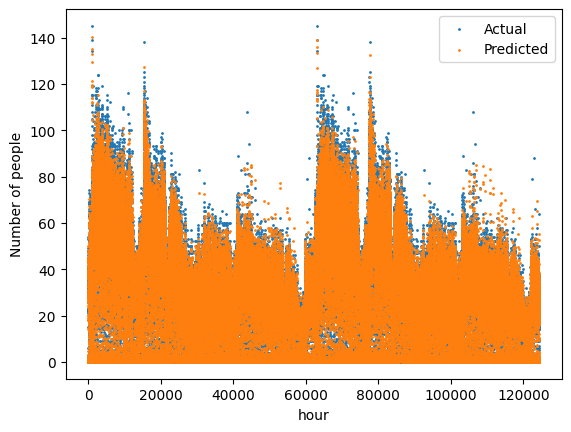

In [114]:
plt.scatter(X.index, y, s=1, label='Actual')
plt.scatter(X.index, pred, s=1, label='Predicted')

plt.xlabel('hour')
plt.ylabel('Number of people')
plt.legend()
plt.show()